In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv(r'/Users/alex/Desktop/ProjectFinalAnswers/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295836,ZWE,Africa,Zimbabwe,2023-03-12,264385.0,13.0,16.429,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295837,ZWE,Africa,Zimbabwe,2023-03-13,264391.0,6.0,16.429,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295838,ZWE,Africa,Zimbabwe,2023-03-14,264391.0,0.0,14.857,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295839,ZWE,Africa,Zimbabwe,2023-03-15,264391.0,0.0,10.857,5672.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [4]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_p

In [5]:
df2 = pd.DataFrame([df.iso_code,df.location,df.date,df.total_cases_per_million,df.icu_patients_per_million,df.total_vaccinations,df.population]).transpose()
df2

,iso_code,location,date,total_cases_per_million,icu_patients_per_million,total_vaccinations,population
0,AFG,Afghanistan,2020-01-03,NaN,NaN,NaN,41128772.0
1,AFG,Afghanistan,2020-01-04,NaN,NaN,NaN,41128772.0
2,AFG,Afghanistan,2020-01-05,NaN,NaN,NaN,41128772.0
3,AFG,Afghanistan,2020-01-06,NaN,NaN,NaN,41128772.0
4,AFG,Afghanistan,2020-01-07,NaN,NaN,NaN,41128772.0
...,...,...,...,...,...,...,...
295836,ZWE,Zimbabwe,2023-03-12,16199.526,NaN,NaN,16320539.0
295837,ZWE,Zimbabwe,2023-03-13,16199.894,NaN,NaN,16320539.0
295838,ZWE,Zimbabwe,2023-03-14,16199.894,NaN,NaN,16320539.0
295839,ZWE,Zimbabwe,2023-03-15,16199.894,NaN,NaN,16320539.0


In [6]:
df2[['date']]= df2[['date']].apply(pd.to_datetime)
df2['days_since']=df2.apply(lambda row: row.date- datetime.strptime('2020-12-09','%Y-%m-%d'),axis =1)
df2['days_since']=df2['days_since'].dt.days
print(df2.dtypes)
df2

iso_code                            object
location                            object
date                        datetime64[ns]
total_cases_per_million             object
icu_patients_per_million            object
total_vaccinations                  object
population                          object
days_since                           int64
dtype: object


,iso_code,location,date,total_cases_per_million,icu_patients_per_million,total_vaccinations,population,days_since
0,AFG,Afghanistan,2020-01-03,NaN,NaN,NaN,41128772.0,-341
1,AFG,Afghanistan,2020-01-04,NaN,NaN,NaN,41128772.0,-340
2,AFG,Afghanistan,2020-01-05,NaN,NaN,NaN,41128772.0,-339
3,AFG,Afghanistan,2020-01-06,NaN,NaN,NaN,41128772.0,-338
4,AFG,Afghanistan,2020-01-07,NaN,NaN,NaN,41128772.0,-337
...,...,...,...,...,...,...,...,...
295836,ZWE,Zimbabwe,2023-03-12,16199.526,NaN,NaN,16320539.0,823
295837,ZWE,Zimbabwe,2023-03-13,16199.894,NaN,NaN,16320539.0,824
295838,ZWE,Zimbabwe,2023-03-14,16199.894,NaN,NaN,16320539.0,825
295839,ZWE,Zimbabwe,2023-03-15,16199.894,NaN,NaN,16320539.0,826


In [7]:
df2['total_vaccinations_per_million'] = df2.apply(lambda row: (row.total_vaccinations/row.population)*1000000, axis =1)
df2 = df2.loc[(df2['days_since'] >349)]
df2

,iso_code,location,date,total_cases_per_million,icu_patients_per_million,total_vaccinations,population,days_since,total_vaccinations_per_million
691,AFG,Afghanistan,2021-11-24,3817.644,NaN,NaN,41128772.0,350,NaN
692,AFG,Afghanistan,2021-11-25,3818.057,NaN,NaN,41128772.0,351,NaN
693,AFG,Afghanistan,2021-11-26,3820.78,NaN,NaN,41128772.0,352,NaN
694,AFG,Afghanistan,2021-11-27,3821.437,NaN,NaN,41128772.0,353,NaN
695,AFG,Afghanistan,2021-11-28,3821.899,NaN,NaN,41128772.0,354,NaN
...,...,...,...,...,...,...,...,...,...
295836,ZWE,Zimbabwe,2023-03-12,16199.526,NaN,NaN,16320539.0,823,NaN
295837,ZWE,Zimbabwe,2023-03-13,16199.894,NaN,NaN,16320539.0,824,NaN
295838,ZWE,Zimbabwe,2023-03-14,16199.894,NaN,NaN,16320539.0,825,NaN
295839,ZWE,Zimbabwe,2023-03-15,16199.894,NaN,NaN,16320539.0,826,NaN


In [8]:
df2 = pd.DataFrame([df2.iso_code,df2.location, df2.days_since,df2.total_cases_per_million,df2.total_vaccinations_per_million,df2.icu_patients_per_million]).transpose()
df2

,iso_code,location,days_since,total_cases_per_million,total_vaccinations_per_million,icu_patients_per_million
691,AFG,Afghanistan,350,3817.644,NaN,NaN
692,AFG,Afghanistan,351,3818.057,NaN,NaN
693,AFG,Afghanistan,352,3820.78,NaN,NaN
694,AFG,Afghanistan,353,3821.437,NaN,NaN
695,AFG,Afghanistan,354,3821.899,NaN,NaN
...,...,...,...,...,...,...
295836,ZWE,Zimbabwe,823,16199.526,NaN,NaN
295837,ZWE,Zimbabwe,824,16199.894,NaN,NaN
295838,ZWE,Zimbabwe,825,16199.894,NaN,NaN
295839,ZWE,Zimbabwe,826,16199.894,NaN,NaN


In [9]:
df3 = df2.loc[df2['location']== 'United States']
df4 = df2.loc[df2['location']== 'Chile']

df5 = df2.loc[df2['location']== 'South Korea']
df5 = df5.loc[(df5['days_since'] <730)]
df6 = df2.loc[df2['location']== 'France']
df5

,iso_code,location,days_since,total_cases_per_million,total_vaccinations_per_million,icu_patients_per_million
247524,KOR,South Korea,350,8203.365,1624474.21451,11.309
247525,KOR,South Korea,351,8279.327,1630698.473331,11.811
247526,KOR,South Korea,352,8354.613,1639245.382413,11.908
247527,KOR,South Korea,353,8433.102,1642177.402695,12.236
247528,KOR,South Korea,354,8508.813,1642293.872943,12.487
...,...,...,...,...,...,...
247899,KOR,South Korea,725,527022.371,2501812.825152,8.878
247900,KOR,South Korea,726,527469.339,2501863.041487,8.839
247901,KOR,South Korea,727,528967.029,2501901.929234,8.55
247902,KOR,South Korea,728,530408.944,2501939.137956,8.511


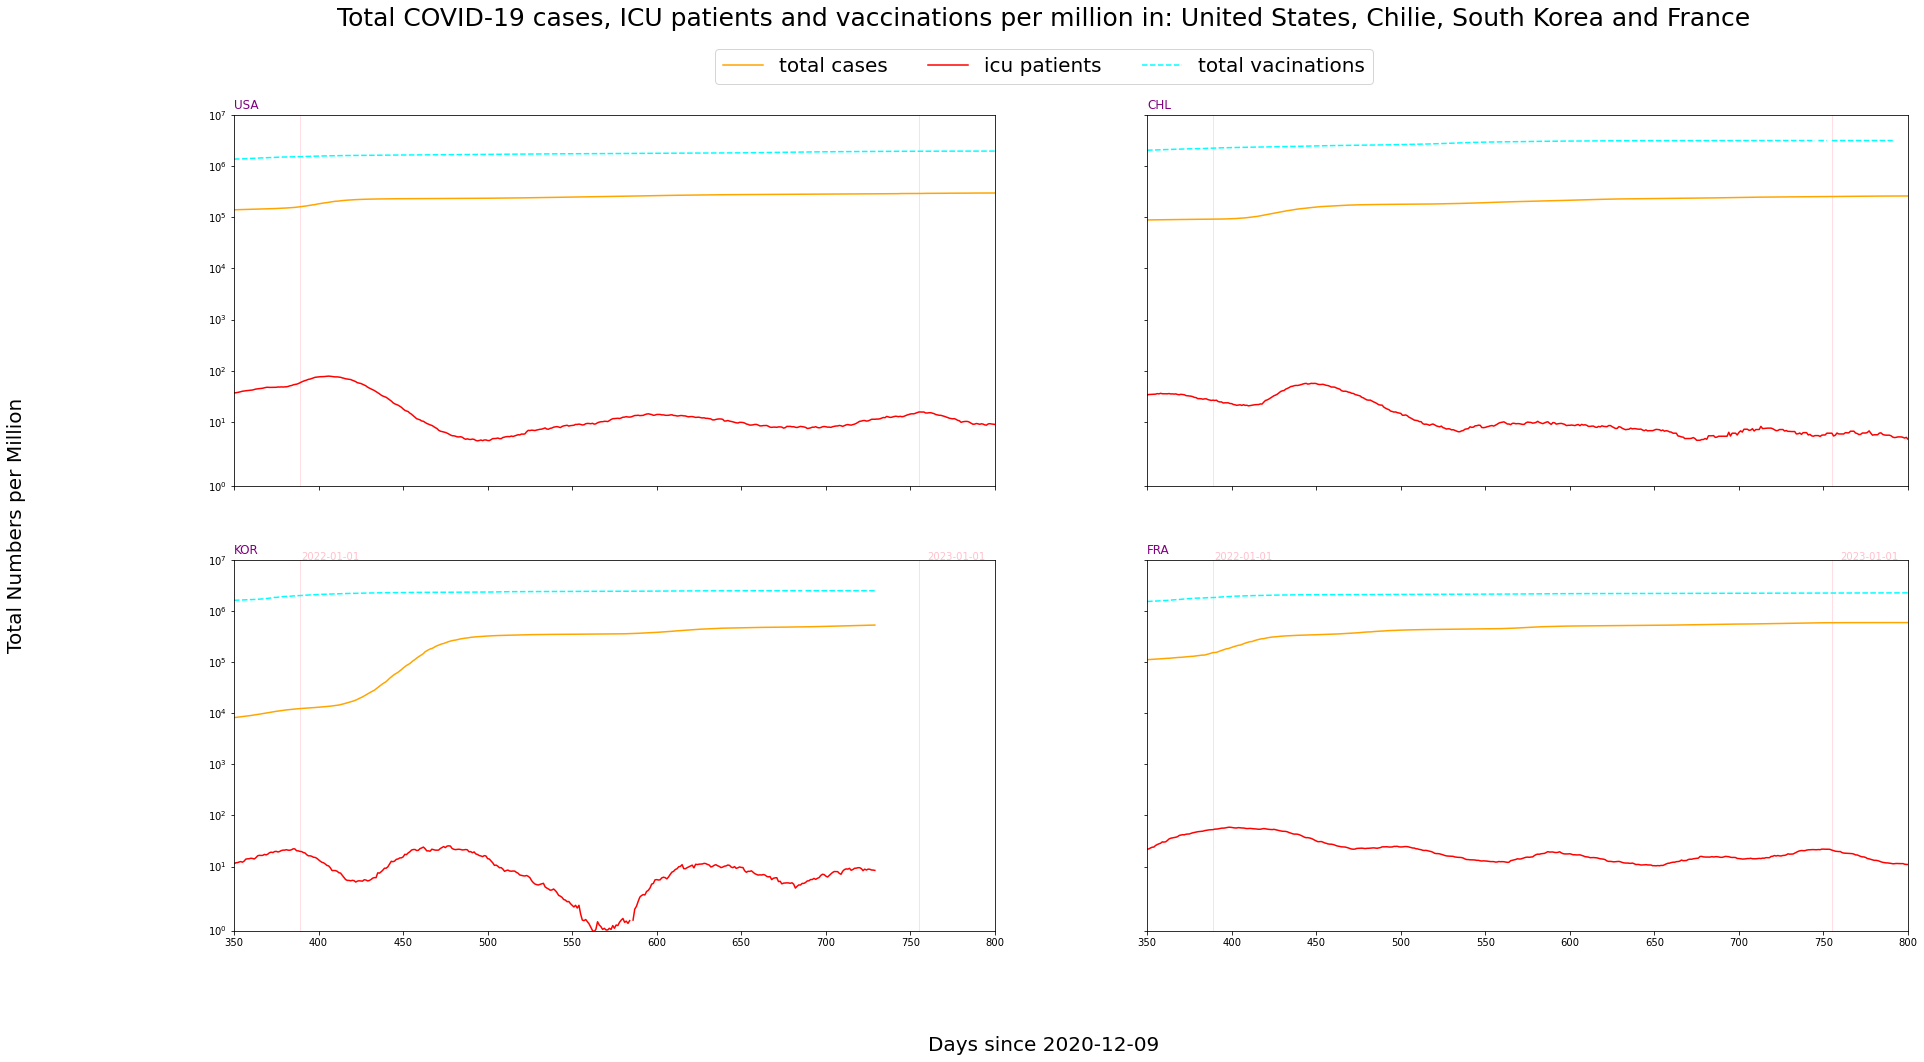

In [10]:

fig,axs = plt.subplots(2,2, sharex='all', sharey='all', figsize=(30, 15))
fig.suptitle('Total COVID-19 cases, ICU patients and vaccinations per million in: United States, Chilie, South Korea and France', size = 25)
fig.supxlabel('Days since 2020-12-09',size = 20)
fig.supylabel('Total Numbers per Million',size =20)

plt.xlim(350,800)
plt.xticks(np.arange(350, 801, 50))
plt.ylim(1,10000000)
plt.yscale('symlog')

x = df3.days_since
cases= df3.total_cases_per_million	
patients=df3.icu_patients_per_million
vaccine = df3.total_vaccinations_per_million
axs[0,0].plot(x,df3.total_cases_per_million,color = "orange",label = "total cases")
axs[0,0].plot(x,df3.icu_patients_per_million,color = "red",label = "icu patients")
axs[0,0].plot(x,df3.total_vaccinations_per_million,'--',color = "cyan",label="total vacinations")
axs[0,0].set_title('USA', color = 'purple',loc = 'left')


plt.plot()

x = df4.days_since
y1= df4.total_cases_per_million	
y2=df4.icu_patients_per_million
y3 = df4.total_vaccinations_per_million
axs[0,1].plot(x,df4.total_cases_per_million,color = "orange",label = "total cases")
axs[0,1].plot(x,df4.icu_patients_per_million,color = "red",label = "icu patients")
axs[0,1].plot(x,df4.total_vaccinations_per_million,'--',color = "cyan",label="total vacinations")
axs[0,1].set_title('CHL', color = 'purple',loc = 'left')


plt.plot()

x = df5.days_since
cases= df5.total_cases_per_million	
patients=df5.icu_patients_per_million
vaccine= df5.total_vaccinations_per_million
axs[1,0].plot(x,df5.total_cases_per_million,color = "orange",label = "total cases")
axs[1,0].plot(x,df5.icu_patients_per_million,color = "red",label = "icu patients")
axs[1,0].plot(x,df5.total_vaccinations_per_million,'--',color = "cyan",label="total vacinations")
axs[1,0].set_title('KOR', color = 'purple',loc = 'left')

plt.plot()

x = df6.days_since
cases= df6.total_cases_per_million	
patients=df6.icu_patients_per_million
vaccine = df6.total_vaccinations_per_million
axs[1,1].plot(x,df6.total_cases_per_million,color = "orange",label = "total cases")
axs[1,1].plot(x,df6.icu_patients_per_million,color = "red",label = "icu patients")
axs[1,1].plot(x,df6.total_vaccinations_per_million,'--',color = "cyan",label="total vacinations")
axs[1,1].set_title('FRA', color = 'purple',loc = 'left')


plt.plot()
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center", bbox_to_anchor=(0.5,0.925),prop = { "size": 20 },frameon=True,ncol = 5)


for axs in [axs[0,0], axs[0,1], axs[1,0],axs[1,1]]:
    axs.axvline(x=389, c="pink",linewidth=0.5,zorder=0,label='2022-01-01')
    axs.axvline(x=755, c="pink",linewidth=0.5,zorder=0,label ='2023-01-01')
   
plt.text(-150,10000000,"2022-01-01",color = "pink")
plt.text(220,10000000,"2023-01-01",color = "pink")  

plt.text(390,10000000,"2022-01-01",color = "pink")  
plt.text(760,10000000,"2023-01-01",color = "pink")     
plt.show()

Part B: I am going to run data analysis of the relations between vaccinations, new cases and deaths 

In [11]:
dfc = df.loc[df['location'] == 'United Kingdom']
dfb = pd.DataFrame([dfc.icu_patients_per_million,dfc.total_cases_per_million,dfc.new_cases_per_million,dfc.new_cases,dfc.new_cases_smoothed,dfc.total_vaccinations,dfc.new_deaths,dfc.weekly_icu_admissions,dfc.population,dfc.new_deaths_smoothed,dfc.new_deaths_smoothed_per_million]).transpose()
dfb

,icu_patients_per_million,total_cases_per_million,new_cases_per_million,new_cases,new_cases_smoothed,total_vaccinations,new_deaths,weekly_icu_admissions,population,new_deaths_smoothed,new_deaths_smoothed_per_million
277229,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN
277230,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN
277231,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN
277232,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN
277233,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
278393,NaN,361780.195,NaN,NaN,NaN,NaN,0.0,NaN,67508936.0,21.000,0.311
278394,NaN,361780.195,NaN,NaN,NaN,NaN,0.0,NaN,67508936.0,12.286,0.182
278395,NaN,361780.195,NaN,NaN,NaN,NaN,0.0,NaN,67508936.0,2.857,0.042
278396,NaN,361780.195,NaN,NaN,NaN,NaN,0.0,NaN,67508936.0,0.143,0.002


In [12]:

dfb['total_vaccinations_per_million'] = dfb.apply(lambda row: (row.total_vaccinations/row.population)*1000000, axis =1)
dfb['log_total_vaccinations'] = np.log(dfb['total_vaccinations'])
dfb['log_new_deaths'] = np.log(dfb['new_deaths'])
dfb['log_new_deaths_smoothed'] = np.log(dfb['new_deaths_smoothed'])
dfb

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,icu_patients_per_million,total_cases_per_million,new_cases_per_million,new_cases,new_cases_smoothed,total_vaccinations,new_deaths,weekly_icu_admissions,population,new_deaths_smoothed,new_deaths_smoothed_per_million,total_vaccinations_per_million,log_total_vaccinations,log_new_deaths,log_new_deaths_smoothed
277229,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN,NaN,NaN,-inf,NaN
277230,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN,NaN,NaN,-inf,NaN
277231,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN,NaN,NaN,-inf,NaN
277232,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN,NaN,NaN,-inf,NaN
277233,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,67508936.0,NaN,NaN,NaN,NaN,-inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278393,NaN,361780.195,NaN,NaN,NaN,NaN,0.0,NaN,67508936.0,21.000,0.311,NaN,NaN,-inf,3.044522
278394,NaN,361780.195,NaN,NaN,NaN,NaN,0.0,NaN,67508936.0,12.286,0.182,NaN,NaN,-inf,2.508460
278395,NaN,361780.195,NaN,NaN,NaN,NaN,0.0,NaN,67508936.0,2.857,0.042,NaN,NaN,-inf,1.049772
278396,NaN,361780.195,NaN,NaN,NaN,NaN,0.0,NaN,67508936.0,0.143,0.002,NaN,NaN,-inf,-1.944911


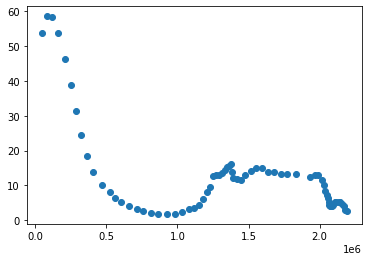

In [13]:
plt.scatter(dfb.total_vaccinations_per_million,dfb.icu_patients_per_million)
plt.show()

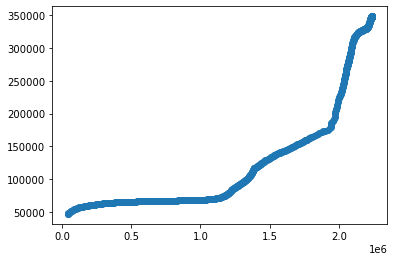

In [14]:
plt.scatter(dfb.total_vaccinations_per_million,dfb.total_cases_per_million)
plt.show()

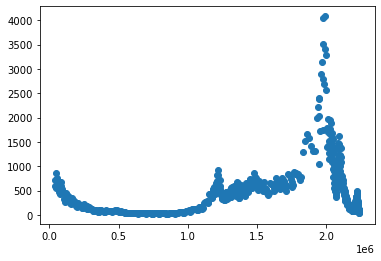

In [15]:
plt.scatter(dfb.total_vaccinations_per_million,dfb.new_cases_per_million)

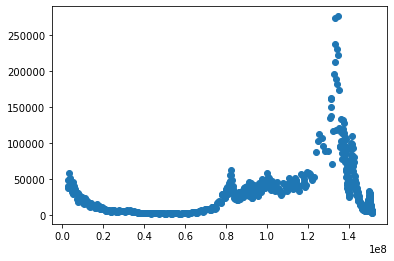

In [16]:
plt.scatter(dfb.total_vaccinations,dfb.new_cases)

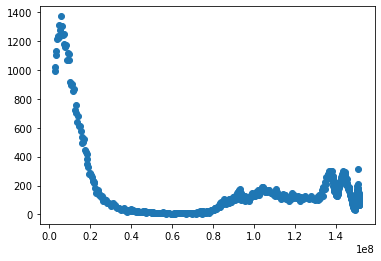

In [17]:
plt.scatter(dfb.total_vaccinations,dfb.new_deaths)

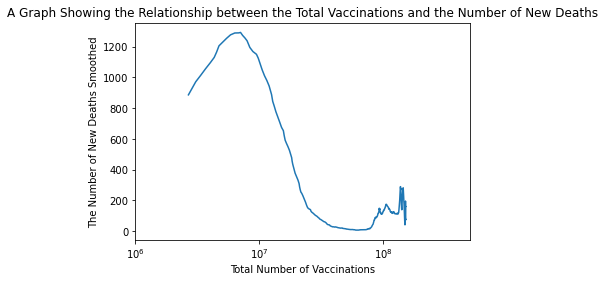

In [18]:


plt.plot(dfb.total_vaccinations,dfb.new_deaths_smoothed, label = "deaths smoothed")
plt.xscale("symlog")
plt.xlim(1000000,500000000)
plt.title("A Graph Showing the Relationship between the Total Vaccinations and the Number of New Deaths")
plt.xlabel("Total Number of Vaccinations")
plt.ylabel("The Number of New Deaths Smoothed")
plt.show()

Is this analaysis we can see thatthe number of new deaths increases unitl the number of vaccinations reaches a maximum point, this is where the minamum number of vacinations are required for there to be an effect on the death rate. Because of this it can be infered that there is a herd immunity effect when there is a large enough percentage of the population who are vaccinated to have a sizable impact on the rest of the population. 

P3.2


P3.3

In [19]:
! pip install cartopy
! pip install xarray
import cartopy as ct
import xarray as xr 
 
import cartopy.crs as crs
import cartopy.feature as cfeature

In [20]:
df = pd.read_csv(r'/Users/alex/Desktop/ProjectFinalAnswers/data/person_2020_update.csv')
df.head()


/var/folders/3k/p31qj6rn0w17bj1rgxjkjmkw0000gn/T/ipykernel_18971/3896904174.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/Users/alex/Desktop/ProjectFinalAnswers/data/person_2020_update.csv')


,id,wd_id,wp_id,slug,name,occupation,prob_ratio,gender,twitter,alive,...,deathdate,deathyear,bplace_geacron_name,dplace_geacron_name,is_group,l_,age,non_en_page_views,coefficient_of_variation,hpi
0,18934,Q9458,18934,Muhammad,Muhammad,RELIGIOUS FIGURE,0.0,M,NaN,False,...,0632-06-08,632.0,Mecca,NaN,False,27.918400,1450.0,5160422.0,3.199355,100.000000
1,17414699,Q720,17414699,Genghis_Khan,Genghis Khan,MILITARY PERSONNEL,0.0,M,NaN,False,...,1227-08-18,1227.0,NaN,NaN,False,25.843621,858.0,3249211.0,2.753641,97.723669
2,18079,Q762,18079,Leonardo_da_Vinci,Leonardo da Vinci,INVENTOR,0.0,M,NaN,False,...,1519-05-02,1519.0,NaN,NaN,False,17.545406,568.0,5362406.0,4.796629,97.460691
3,14627,Q935,14627,Isaac_Newton,Isaac Newton,PHYSICIST,0.0,M,NaN,False,...,1727-03-31,1726.0,NaN,NaN,False,21.608920,378.0,3431331.0,4.632474,96.836567
4,17914,Q255,17914,Ludwig_van_Beethoven,Ludwig van Beethoven,COMPOSER,0.0,M,NaN,False,...,1827-03-26,1827.0,NaN,Austria,False,19.796430,250.0,5179518.0,3.926626,96.583969


In [21]:
df2 = df.loc[ ((df.bplace_country == "United Kingdom")| (df.bplace_country == "Ireland"))& (df.birthyear > 1989) ]

df2

,id,wd_id,wp_id,slug,name,occupation,prob_ratio,gender,twitter,alive,...,deathdate,deathyear,bplace_geacron_name,dplace_geacron_name,is_group,l_,age,non_en_page_views,coefficient_of_variation,hpi
22634,49031829,Q21808729,49031829,Alan_Walker_(music_producer),Alan Walker,MUSICIAN,8.694123,M,iamalanwalker,True,...,NaN,NaN,NaN,NaN,False,18.463821,23.0,799757.0,1.619499,65.354234
28504,30528002,Q47447,30528002,Ed_Sheeran,Ed Sheeran,SINGER,0.000000,M,edsheeran,True,...,NaN,NaN,NaN,NaN,False,7.217657,29.0,1436469.0,4.516096,63.630297
28684,49002318,Q21914464,49002318,Dua_Lipa,Dua Lipa,SINGER,3.349280,F,dualipa,True,...,NaN,NaN,United Kingdom,NaN,False,6.554756,25.0,3462429.0,4.344626,63.577836
31130,24436958,Q206641,24436958,"Phil_Jones_(footballer,_born_1992)",Phil Jones,SOCCER PLAYER,0.000000,M,PhilJones4,True,...,NaN,NaN,United Kingdom,NaN,True,18.730322,28.0,113923.0,1.736089,62.865148
31420,40605906,Q2756349,40605906,Liam_Payne,Liam Payne,SINGER,2.006854,M,LiamPayne,True,...,NaN,NaN,NaN,NaN,False,12.576236,27.0,565883.0,1.994396,62.775306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88888,43970029,Q1027353,43970029,Callum_Skinner,Callum Skinner,CYCLIST,5.506648,F,CallumSkinner,True,...,NaN,NaN,NaN,NaN,False,1.631067,28.0,506.0,3.391765,29.298930
88891,43887516,Q18169400,43887516,Regan_Poole,Regan Poole,SOCCER PLAYER,96.751387,M,NaN,True,...,NaN,NaN,NaN,NaN,False,1.585221,22.0,1376.0,3.129169,29.226867
88897,33155036,Q674513,33155036,Larnell_Cole,Larnell Cole,SOCCER PLAYER,139.691071,M,NaN,True,...,NaN,NaN,United Kingdom,NaN,False,1.255338,27.0,910.0,3.605026,28.929755
88908,36605204,Q2995045,36605204,Constantine_Louloudis,Constantine Louloudis,ATHLETE,1.677303,M,clouloudis,True,...,NaN,NaN,United Kingdom,NaN,False,1.484594,29.0,403.0,3.466518,28.267085


In [22]:
df2= df2.dropna(subset=['bplace_lat'])
df2 = df2.dropna(axis=0, subset=['bplace_lon'])
df2

,id,wd_id,wp_id,slug,name,occupation,prob_ratio,gender,twitter,alive,...,deathdate,deathyear,bplace_geacron_name,dplace_geacron_name,is_group,l_,age,non_en_page_views,coefficient_of_variation,hpi
22634,49031829,Q21808729,49031829,Alan_Walker_(music_producer),Alan Walker,MUSICIAN,8.694123,M,iamalanwalker,True,...,NaN,NaN,NaN,NaN,False,18.463821,23.0,799757.0,1.619499,65.354234
28504,30528002,Q47447,30528002,Ed_Sheeran,Ed Sheeran,SINGER,0.000000,M,edsheeran,True,...,NaN,NaN,NaN,NaN,False,7.217657,29.0,1436469.0,4.516096,63.630297
28684,49002318,Q21914464,49002318,Dua_Lipa,Dua Lipa,SINGER,3.349280,F,dualipa,True,...,NaN,NaN,United Kingdom,NaN,False,6.554756,25.0,3462429.0,4.344626,63.577836
31130,24436958,Q206641,24436958,"Phil_Jones_(footballer,_born_1992)",Phil Jones,SOCCER PLAYER,0.000000,M,PhilJones4,True,...,NaN,NaN,United Kingdom,NaN,True,18.730322,28.0,113923.0,1.736089,62.865148
31420,40605906,Q2756349,40605906,Liam_Payne,Liam Payne,SINGER,2.006854,M,LiamPayne,True,...,NaN,NaN,NaN,NaN,False,12.576236,27.0,565883.0,1.994396,62.775306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88888,43970029,Q1027353,43970029,Callum_Skinner,Callum Skinner,CYCLIST,5.506648,F,CallumSkinner,True,...,NaN,NaN,NaN,NaN,False,1.631067,28.0,506.0,3.391765,29.298930
88891,43887516,Q18169400,43887516,Regan_Poole,Regan Poole,SOCCER PLAYER,96.751387,M,NaN,True,...,NaN,NaN,NaN,NaN,False,1.585221,22.0,1376.0,3.129169,29.226867
88897,33155036,Q674513,33155036,Larnell_Cole,Larnell Cole,SOCCER PLAYER,139.691071,M,NaN,True,...,NaN,NaN,United Kingdom,NaN,False,1.255338,27.0,910.0,3.605026,28.929755
88908,36605204,Q2995045,36605204,Constantine_Louloudis,Constantine Louloudis,ATHLETE,1.677303,M,clouloudis,True,...,NaN,NaN,United Kingdom,NaN,False,1.484594,29.0,403.0,3.466518,28.267085


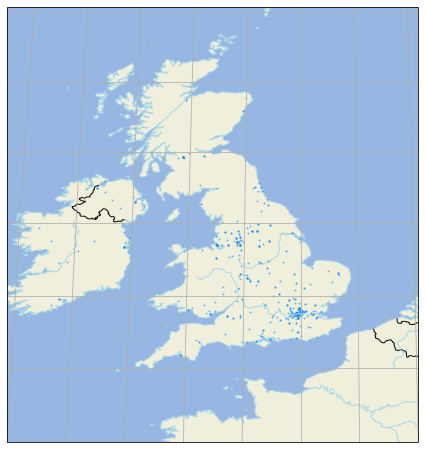

In [47]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.Robinson())

ax.set_global()

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS, edgecolor="black")
ax.add_feature(cfeature.RIVERS, edgecolor ="lightblue")
ax.add_feature(cfeature.OCEAN, edgecolor ="lightblue")
ax.gridlines()
ax.set_extent([-10, 4, 48,60])


plt.scatter(x=df2.bplace_lon, y=df2.bplace_lat,
            color="dodgerblue",
            s=1,
            alpha=0.5,
            transform=crs.PlateCarree()) ## Important

plt.show()